In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('index.csv')

Initial Analysis of Data

In [7]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


We can see there are 6 columns of data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1208 non-null   object 
 1   datetime     1208 non-null   object 
 2   cash_type    1208 non-null   object 
 3   card         1119 non-null   object 
 4   money        1208 non-null   float64
 5   coffee_name  1208 non-null   object 
dtypes: float64(1), object(5)
memory usage: 56.8+ KB


This gives us basic information on the data.

In [11]:
df.describe()

,money
count,1208.000000
mean,32.828460
std,5.107246
min,18.120000
25%,27.920000
50%,32.820000
75%,37.720000
max,40.000000


This gives us a summary of the numerical data in the dataset, the money column in this particular dataset.

From count we can see there are 1208 rows in this dtaset.

As well as the min and max amounts spend at these vending machines.


In [93]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
hour            0
day_of_week     0
month           0
dtype: int64

Here I search for all null values in the data set, cells with no data from the excel file. In the "card_type" column there are two possible entries, card or cash.

There are 89 blank centries for "card", which uses a unique identifier in place of credit card information, which indicates in this particular data set that that person used cash.

We can deduce that out the 1208 entries, less than one percent are cash purchases (0.736%)

In [81]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,hour,day_of_week,month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,Friday,March
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,Friday,March
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,Friday,March
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,Friday,March
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,Friday,March


Which Coffee Products are Purchased Most Frequently?

In [31]:
coffee_frequency = df['coffee_name'].value_counts()

print(coffee_frequency)

coffee_name
Americano with Milk    293
Latte                  257
Cappuccino             209
Americano              174
Cortado                109
Hot Chocolate           75
Espresso                52
Cocoa                   39
Name: count, dtype: int64


We can see the two most frequent coffees sold from the vending machines are Americano with Milk and Latte.

In [ ]:
Are There Specific Times of Days, Days of Week, or Months Where Coffee Sales Are Highest?

In [106]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()

sales_by_hour = df.groupby('hour')['money'].sum()

sales_by_day = df.groupby('day_of_week')['money'].sum()

sales_by_month = df.groupby('month')['money'].sum()

print("Sales by Hour:")
print(sales_by_hour)
print("\nSales by Day of Week:")
print(sales_by_day)
print("\nSales by Month:")
print(sales_by_month)


max_sales_hour = sales_by_hour.idxmax()
max_sales_hour_value = sales_by_hour.max()

print(f"\nHighest Sales by Hour: {max_sales_hour} with a total of ${max_sales_hour_value}")


max_sales_day = sales_by_day.idxmax()
max_sales_day_value = sales_by_day.max()

print(f"\nHighest Sales by Day of Week: {max_sales_day} with a total of ${max_sales_day_value}")


max_sales_month = sales_by_month.idxmax()
max_sales_month_value = sales_by_month.max()

print(f"\nHighest Sales by Month: {max_sales_month} with a total of ${max_sales_month_value}")


Sales by Hour:
hour
7      420.72
8     1533.20
9     1683.00
10    4664.86
11    3513.34
12    2998.52
13    2651.20
14    2484.92
15    2252.32
16    2725.70
17    2854.12
18    2618.78
19    3547.52
20    1984.02
21    2503.06
22    1221.50
Name: money, dtype: float64

Sales by Day of Week:
day_of_week
Friday       5525.92
Monday       5362.04
Saturday     5574.32
Sunday       5237.32
Thursday     6010.44
Tuesday      6340.34
Wednesday    5606.40
Name: money, dtype: float64

Sales by Month:
month
April     6720.56
August    2147.90
July      6915.94
June      7758.76
March     7050.20
May       9063.42
Name: money, dtype: float64

Highest Sales by Hour: 10 with a total of $4664.86

Highest Sales by Day of Week: Tuesday with a total of $6340.34

Highest Sales by Month: May with a total of $9063.42


Here we check the highest sales per hour of the day, highest sales by week day, and highest sales by month. We can see the highest hour makes sense, is mid-morning on the commute to work. Tuesday has the highest sales, we could thoerize monday everyones getting back to the office, its busy, we might not have as much free time to grab a coffee, or remote workers coming into the office may be at play. The highest sales of the month was in May. With additonal data, we could look more into these significant high points for insights to increase overall revenue. With weather data, local taffic data, location data, further anaylsis into what coffee type sells the most on these high points and does it reflect enviornmental conditions or heavy return customers who lean into one type of drink.

In [ ]:
How Do Sales Vary by Product Type?

In [122]:
sales_by_product = df.groupby('coffee_name')['money'].sum()

print(sales_by_product)

max_product = sales_by_product.idxmax()

max_sales = sales_by_product.max()

print(f"The product with the highest sales is {max_product} with sales amounting to ${max_sales}.")

coffee_name
Americano              4759.64
Americano with Milk    9299.94
Cappuccino             7759.80
Cocoa                  1427.22
Cortado                2975.28
Espresso               1154.98
Hot Chocolate          2811.30
Latte                  9468.62
Name: money, dtype: float64
The product with the highest sales is Latte with sales amounting to $9468.62.


This is intersting, as we saw earlier, coffee frequency bought, Latte was second and Americano with Milk was most frequently purchased. However, here we can see Latte is a more profitable product, amounting to a higher revenue dollar than the Americano with Milk.

In [ ]:
What Are the Average Purchase Quantities Per Transaction?

In [39]:
average_transaction = df['money'].mean()

print(f"Average Purchase per Transaction: {average_transaction:.2f}")

Average Purchase per Transaction: 32.83


The Average amount spent is $32.83, a substantial sum for coffee. At first looking at the data I am assuming there is a decimal error, however, as a public data set without the ability to ask directly I made no assumption since I could not back it with facts. 

In [ ]:
Is There a Correlation Between Weather Conditions and Coffee Sales?


We would need weather data, we would also need to know the area where the vending machines are located, which we do not have this information. So I could not analys this question with my current resources.

In [ ]:
However, we can take a look at coffe sales over time.

In [ ]:
How have coffee sales evolved over time?

The peak sales occured on 2024-07-30 with a total sales amount of 650.48.


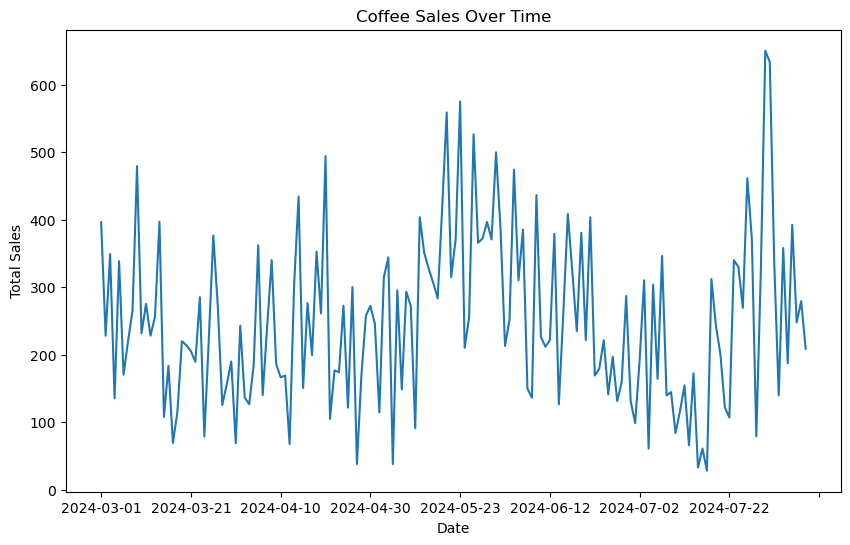

In [126]:
sales_over_time = df.groupby('date')['money'].sum()

plt.figure(figsize=(10,6))
sales_over_time.plot(title='Coffee Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show


max_sales_date = sales_over_time.idxmax()

max_sales_value = sales_over_time.max()

print(f"The peak sales occured on {max_sales_date} with a total sales amount of {max_sales_value}.")

We can see from the coffee sales over time, there is an obvious spike in quantity of coffee sold. This was 650 units solds on July 30, 2024. Without location data, and local traffic data, we could theorize that schools are starting again, this could be related to parents getting reach to wake up early to take thier kids to school for the first time since spring, or an extra coffee to go back to school shopping after a full shift at work.

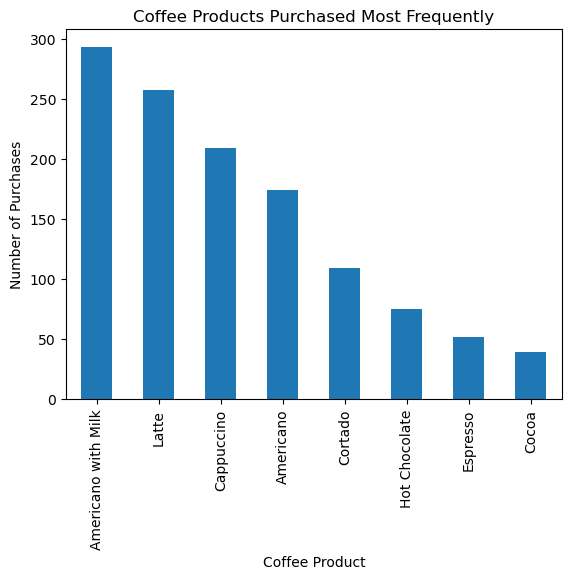

In [41]:
import matplotlib.pyplot as plt

coffee_frequency.plot(kind='bar', title='Coffee Products Purchased Most Frequently')
plt.xlabel('Coffee Product')
plt.ylabel('Number of Purchases')
plt.show()

Visualization of quantities sold between the various product types. We can see some low sales are coming from cocoa and esspresso. We could see if these are location specific or across all coffe vending machines. If so, it may be appropriate to remove certain products at certain locations and replace them with lcoation specific high performing products. 

Location data in addition to the current data would allow for much greater insight into strategies for increasing sales and revenue, and optomizing locations to perform best in their specific area.

In [ ]:
Are There Noticable trends in Sale Growth or Decline?

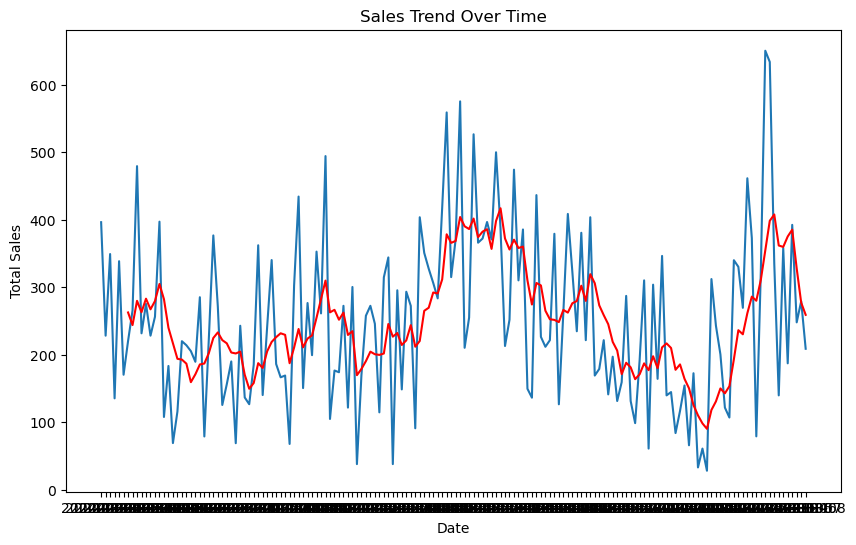

In [51]:
sales_trend = sales_over_time.rolling(window=7).mean()

plt.figure(figsize=(10,6))
plt.plot(sales_over_time, label='Daily Sales')
plt.plot(sales_trend, color='red', label='7-Day Rolling Mean (Trend)')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

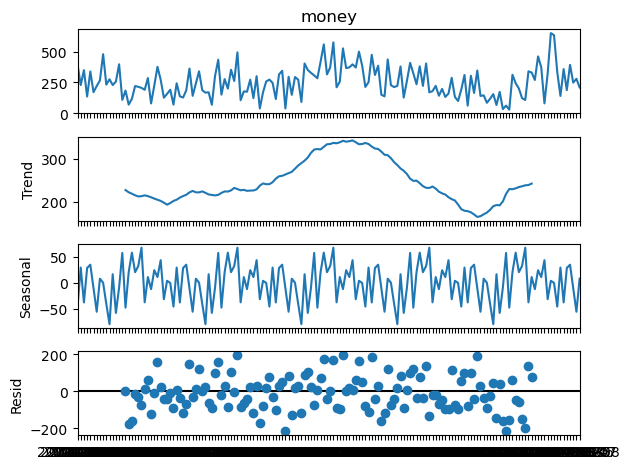

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales_over_time, model='addative', period=30)

decomposition.plot()

plt.show()

In [ ]:
Are There Any Spikes in Sales Related to Specific Events or Promotions?

date
2024-05-20    559.02
2024-05-23    575.40
2024-05-26    526.60
2024-07-30    650.48
2024-07-31    633.84
Name: money, dtype: float64


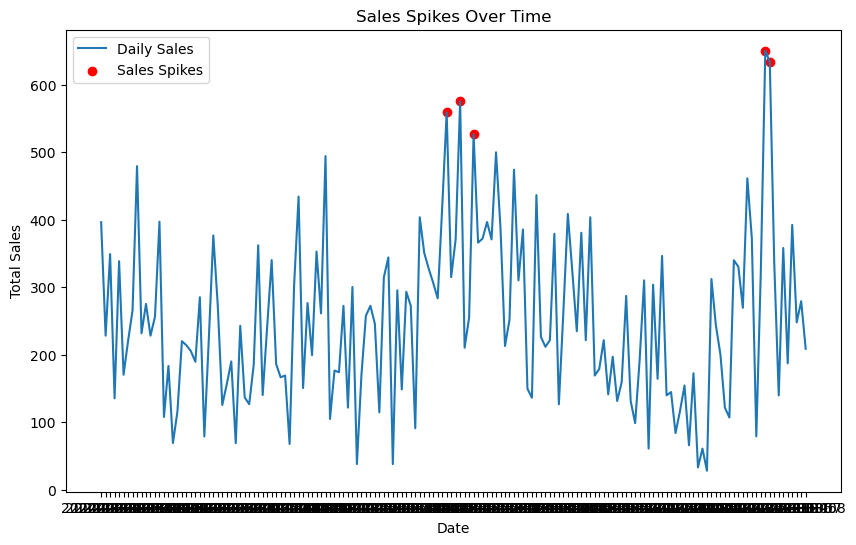

In [61]:
sales_mean = sales_over_time.mean()
sales_std = sales_over_time.std()

spikes = sales_over_time[sales_over_time > (sales_mean + 2 * sales_std)]

print(spikes)

plt.figure(figsize=(10,6))
plt.plot(sales_over_time, label='Daily Sales')
plt.scatter(spikes.index, spikes, color='red', label='Sales Spikes')
plt.title('Sales Spikes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

We can certainly see spikes in activity in the vending machines, however, without additional data such as weather, traffic, location, and more we can only make broad assumptions as to what may have caused these spikes.

In [ ]:
What are the Most and Least Popular coffee Poroducts?

product_popularity = df['coffee_name'].value_counts()

print("Most Popular Coffee Products:")
print(product_popularity.head())

print("\nLeast Popular Coffee Products:")
print(product_popularity.tail())

In [ ]:
Do Customers Exhibit Loyalty to Certain Coffee Products, or Do They Tend to Vary Their Purchases?

In [73]:
customer_loyalty = df.groupby(['card', 'coffee_name']).size().unstack(fill_value=0)

customer_product_variety = customer_loyalty.apply(lambda x: x[x > 0].count(), axis=1)

print("Customer Loyatly - Number of Different Products Purchased by Each Customer:")
print(customer_product_variety.describe())

loyal_customers = customer_product_variety[customer_product_variety == 1]
print("\nNumber of Loyal Customers (Buying Only One Type of Coffee):", len(loyal_customers))

Customer Loyatly - Number of Different Products Purchased by Each Customer:
count    474.000000
mean       1.341772
std        0.719162
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        6.000000
dtype: float64

Number of Loyal Customers (Buying Only One Type of Coffee): 359


A Majority of our customers are loyal to one drink. Out of the 474 customers, 359 only by one coffe product from the vending machines. This can be used for targeted marketing campaigns for loyal customers. Potentially offering, discounts or special promortions on their favorite beverage after x amount of purchases. Would be a great opportunity to add an app where they can store their points, make ann account, get marketing information, and load money onto an app like starbucks does.